## Electricity Price Analysis
**Introduction**
This document presents an analysis of electricity prices from 2018 to 2023, focusing on the impact of the COVID-19 pandemic on price fluctuations. Various data analysis and visualization techniques are employed to derive insights from the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [14]:
df2018 = pd.read_excel("Piyasa_Takas_Fiyati-01012018-31122018.xlsx",engine="openpyxl")
df2019 = pd.read_excel("Piyasa_Takas_Fiyati-01012019-31122019.xlsx",engine="openpyxl")
df2020 = pd.read_excel("Piyasa_Takas_Fiyati-01012020-31122020.xlsx",engine="openpyxl")
df2021 = pd.read_excel("Piyasa_Takas_Fiyati-01012021-31122021.xlsx",engine="openpyxl")
df2022 = pd.read_excel("Piyasa_Takas_Fiyati-01012022-31122022.xlsx",engine="openpyxl")
df2023 = pd.read_excel("Piyasa_Takas_Fiyati-01012023-31122023.xlsx",engine="openpyxl")


df = pd.concat([df2018, df2019, df2020, df2021, df2022, df2023], ignore_index=True)

df.columns = ["Tarih","Saat","PTF_TL","PTF_USD","PTF_EUR"]

df = df.dropna()

df

,Tarih,Saat,PTF_TL,PTF_USD,PTF_EUR
0,2018-01-01 00:00:00,00:00,207.60,55.04,45.97
1,2018-01-01 01:00:00,01:00,205.34,54.44,45.47
2,2018-01-01 02:00:00,02:00,164.94,43.73,36.53
3,2018-01-01 03:00:00,03:00,154.52,40.97,34.22
4,2018-01-01 04:00:00,04:00,112.64,29.86,24.95
...,...,...,...,...,...
52579,2023-12-31 19:00:00,19:00,2499.67,84.91,76.74
52580,2023-12-31 20:00:00,20:00,2472.34,83.98,75.90
52581,2023-12-31 21:00:00,21:00,2472.33,83.98,75.90
52582,2023-12-31 22:00:00,22:00,1800.00,61.15,55.26


In [15]:
df.rename(columns={"Tarih": "Timestamp"}, inplace=True)

df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day
df["Hour"] = df["Timestamp"].dt.hour
df["COVID_Period"] = (df["Timestamp"] >= "2020-03-11").astype(int)

df

,Timestamp,Saat,PTF_TL,PTF_USD,PTF_EUR,Year,Month,Day,Hour,COVID_Period
0,2018-01-01 00:00:00,00:00,207.60,55.04,45.97,2018,1,1,0,0
1,2018-01-01 01:00:00,01:00,205.34,54.44,45.47,2018,1,1,1,0
2,2018-01-01 02:00:00,02:00,164.94,43.73,36.53,2018,1,1,2,0
3,2018-01-01 03:00:00,03:00,154.52,40.97,34.22,2018,1,1,3,0
4,2018-01-01 04:00:00,04:00,112.64,29.86,24.95,2018,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 19:00:00,19:00,2499.67,84.91,76.74,2023,12,31,19,1
52580,2023-12-31 20:00:00,20:00,2472.34,83.98,75.90,2023,12,31,20,1
52581,2023-12-31 21:00:00,21:00,2472.33,83.98,75.90,2023,12,31,21,1
52582,2023-12-31 22:00:00,22:00,1800.00,61.15,55.26,2023,12,31,22,1


## Exploratory Data Analysis (EDA)

In [16]:
#Exploratory Data Analysis (EDA)

pre_covid = df[df["COVID_Period"] == 0]

pre_covid

,Timestamp,Saat,PTF_TL,PTF_USD,PTF_EUR,Year,Month,Day,Hour,COVID_Period
0,2018-01-01 00:00:00,00:00,207.60,55.04,45.97,2018,1,1,0,0
1,2018-01-01 01:00:00,01:00,205.34,54.44,45.47,2018,1,1,1,0
2,2018-01-01 02:00:00,02:00,164.94,43.73,36.53,2018,1,1,2,0
3,2018-01-01 03:00:00,03:00,154.52,40.97,34.22,2018,1,1,3,0
4,2018-01-01 04:00:00,04:00,112.64,29.86,24.95,2018,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...
19195,2020-03-10 19:00:00,19:00,340.01,55.90,49.56,2020,3,10,19,0
19196,2020-03-10 20:00:00,20:00,338.19,55.60,49.30,2020,3,10,20,0
19197,2020-03-10 21:00:00,21:00,329.99,54.26,48.10,2020,3,10,21,0
19198,2020-03-10 22:00:00,22:00,322.68,53.05,47.04,2020,3,10,22,0


In [5]:
pre_covid.describe()

,Timestamp,PTF_TL,PTF_USD,PTF_EUR,Year,Month,Day,Hour,COVID_Period
count,19200,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,19200.0
mean,2019-02-04 23:30:00,250.611753,47.004959,41.075717,2018.631250,6.103750,15.577500,11.500000,0.0
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000,0.0
25%,2018-07-19 23:45:00,194.980000,42.350000,36.060000,2018.000000,3.000000,8.000000,5.750000,0.0
50%,2019-02-04 23:30:00,280.000000,51.360000,44.435000,2019.000000,6.000000,15.500000,11.500000,0.0
75%,2019-08-23 23:15:00,313.370000,55.210000,49.110000,2019.000000,9.000000,23.000000,17.250000,0.0
max,2020-03-10 23:00:00,500.000000,86.350000,75.830000,2020.000000,12.000000,31.000000,23.000000,0.0
std,NaN,79.051955,12.284432,11.029992,0.638588,3.570875,8.812238,6.922367,0.0


In [6]:
covid = df[(df["COVID_Period"] == 1) & (df["Year"] < 2022)]

covid

,Timestamp,Saat,PTF_TL,PTF_USD,PTF_EUR,Year,Month,Day,Hour,COVID_Period
19200,2020-03-11 00:00:00,00:00,220.01,36.01,31.55,2020,3,11,0,1
19201,2020-03-11 01:00:00,01:00,310.00,50.74,44.45,2020,3,11,1,1
19202,2020-03-11 02:00:00,02:00,280.00,45.83,40.15,2020,3,11,2,1
19203,2020-03-11 03:00:00,03:00,262.21,42.92,37.60,2020,3,11,3,1
19204,2020-03-11 04:00:00,04:00,263.58,43.14,37.80,2020,3,11,4,1
...,...,...,...,...,...,...,...,...,...,...
35059,2021-12-31 19:00:00,19:00,1217.00,99.58,88.18,2021,12,31,19,1
35060,2021-12-31 20:00:00,20:00,1217.00,99.58,88.18,2021,12,31,20,1
35061,2021-12-31 21:00:00,21:00,1209.50,98.96,87.64,2021,12,31,21,1
35062,2021-12-31 22:00:00,22:00,1047.00,85.67,75.86,2021,12,31,22,1


In [7]:
covid.describe()

,Timestamp,PTF_TL,PTF_USD,PTF_EUR,Year,Month,Day,Hour,COVID_Period
count,15864,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.0
mean,2021-02-04 11:30:00,403.241066,47.628916,40.786203,2020.552194,7.030257,15.913767,11.500000,1.0
min,2020-03-11 00:00:00,0.000000,0.000000,0.000000,2020.000000,1.000000,1.000000,0.000000,1.0
25%,2020-08-23 05:45:00,297.907500,38.860000,32.847500,2020.000000,4.000000,8.000000,5.750000,1.0
50%,2021-02-04 11:30:00,320.780000,43.300000,36.280000,2021.000000,7.000000,16.000000,11.500000,1.0
75%,2021-07-19 17:15:00,451.362500,52.382500,45.275000,2021.000000,10.000000,23.000000,17.250000,1.0
max,2021-12-31 23:00:00,1217.000000,131.520000,110.640000,2021.000000,12.000000,31.000000,23.000000,1.0
std,NaN,226.150449,18.430449,16.059343,0.497284,3.222892,8.782400,6.922405,0.0


In [8]:
post_covid = df[df["Year"] >= 2022]

post_covid

,Timestamp,Saat,PTF_TL,PTF_USD,PTF_EUR,Year,Month,Day,Hour,COVID_Period
35064,2022-01-01 00:00:00,00:00,949.98,73.20,64.70,2022,1,1,0,1
35065,2022-01-01 01:00:00,01:00,800.00,61.65,54.49,2022,1,1,1,1
35066,2022-01-01 02:00:00,02:00,898.98,69.27,61.23,2022,1,1,2,1
35067,2022-01-01 03:00:00,03:00,1047.00,80.68,71.31,2022,1,1,3,1
35068,2022-01-01 04:00:00,04:00,799.70,61.62,54.47,2022,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 19:00:00,19:00,2499.67,84.91,76.74,2023,12,31,19,1
52580,2023-12-31 20:00:00,20:00,2472.34,83.98,75.90,2023,12,31,20,1
52581,2023-12-31 21:00:00,21:00,2472.33,83.98,75.90,2023,12,31,21,1
52582,2023-12-31 22:00:00,22:00,1800.00,61.15,55.26,2023,12,31,22,1


In [9]:
post_covid.describe()

,Timestamp,PTF_TL,PTF_USD,PTF_EUR,Year,Month,Day,Hour,COVID_Period
count,17520,17520.00000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.0
mean,2022-12-31 23:30:00,2350.01212,122.030235,115.524246,2022.500000,6.526027,15.720548,11.500000,1.0
min,2022-01-01 00:00:00,0.00000,0.000000,0.000000,2022.000000,1.000000,1.000000,0.000000,1.0
25%,2022-07-02 11:45:00,1699.00750,81.120000,74.820000,2022.000000,4.000000,8.000000,5.750000,1.0
50%,2022-12-31 23:30:00,2225.00500,110.060000,99.170000,2022.500000,7.000000,16.000000,11.500000,1.0
75%,2023-07-02 11:15:00,2749.99000,155.640000,149.685000,2023.000000,10.000000,23.000000,17.250000,1.0
max,2023-12-31 23:00:00,4800.00000,264.170000,271.630000,2023.000000,12.000000,31.000000,23.000000,1.0
std,NaN,996.68969,57.006871,57.079571,0.500014,3.447950,8.796498,6.922384,0.0


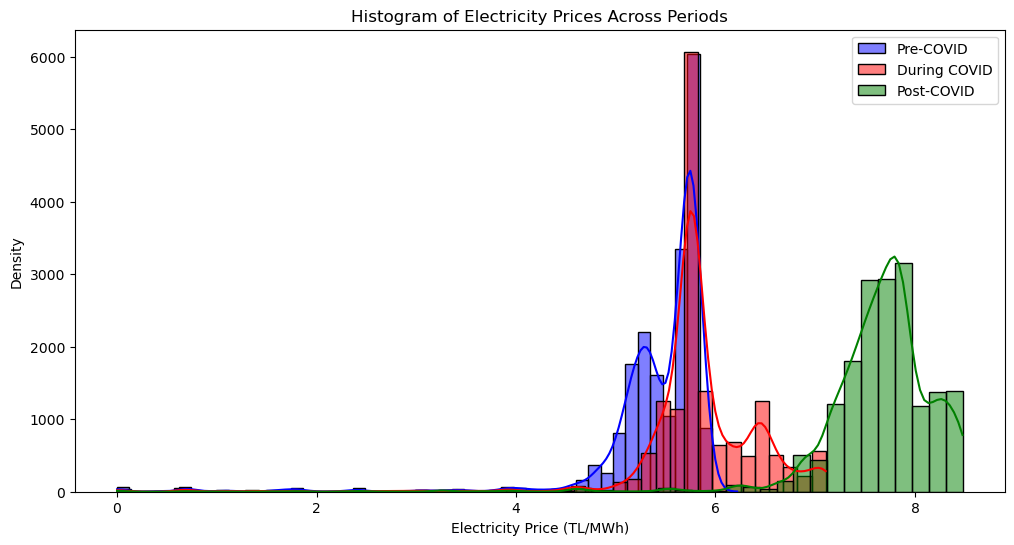

In [10]:
import seaborn as sns

df["PTF_TL_log"] = np.log1p(df["PTF_TL"])

plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(pre_covid.PTF_TL), bins=50, kde=True, label="Pre-COVID", color="blue", alpha=0.5)
sns.histplot(np.log1p(covid.PTF_TL),bins=50, kde=True, label="During COVID", color="red", alpha=0.5)
sns.histplot(np.log1p(post_covid.PTF_TL),bins=50, kde=True, label="Post-COVID", color="green", alpha=0.5)
plt.xlabel("Electricity Price (TL/MWh)")
plt.ylabel("Density")
plt.title("Histogram of Electricity Prices Across Periods")
plt.legend()
plt.show()

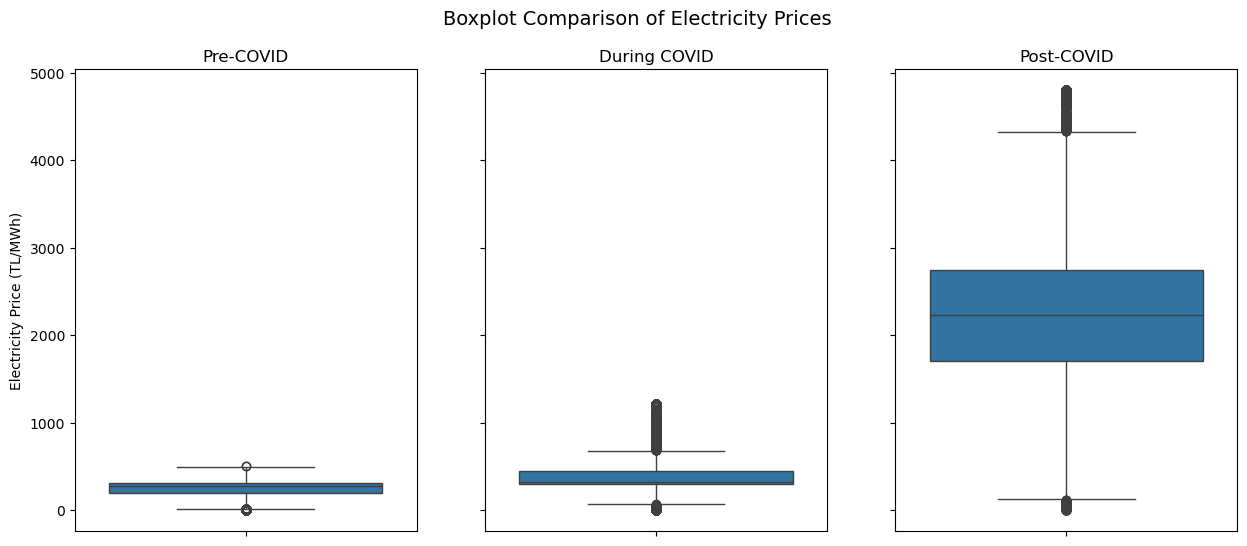

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

sns.boxplot(y=pre_covid["PTF_TL"], ax=axes[0])
axes[0].set_title("Pre-COVID")
axes[0].set_ylabel("Electricity Price (TL/MWh)")

sns.boxplot(y=covid["PTF_TL"], ax=axes[1])
axes[1].set_title("During COVID")
axes[1].set_ylabel("")

sns.boxplot(y=post_covid["PTF_TL"], ax=axes[2])
axes[2].set_title("Post-COVID")
axes[2].set_ylabel("")

plt.suptitle("Boxplot Comparison of Electricity Prices", fontsize=14)

plt.show()

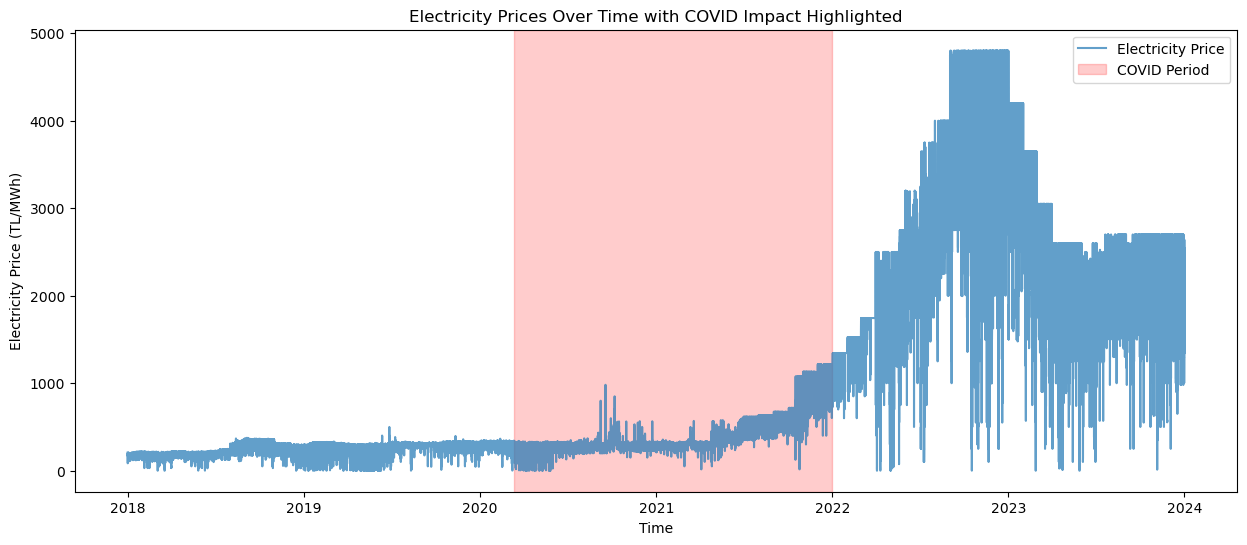

In [12]:
# Time-series plot with COVID period highlighted
plt.figure(figsize=(15, 6))
plt.plot(df["Timestamp"], df.PTF_TL, label="Electricity Price", alpha=0.7)
plt.axvspan(pd.Timestamp("2020-03-11"), pd.Timestamp("2021-12-31"), color='red', alpha=0.2, label="COVID Period")
plt.xlabel("Time")
plt.ylabel("Electricity Price (TL/MWh)")
plt.title("Electricity Prices Over Time with COVID Impact Highlighted")
plt.legend()
plt.show()

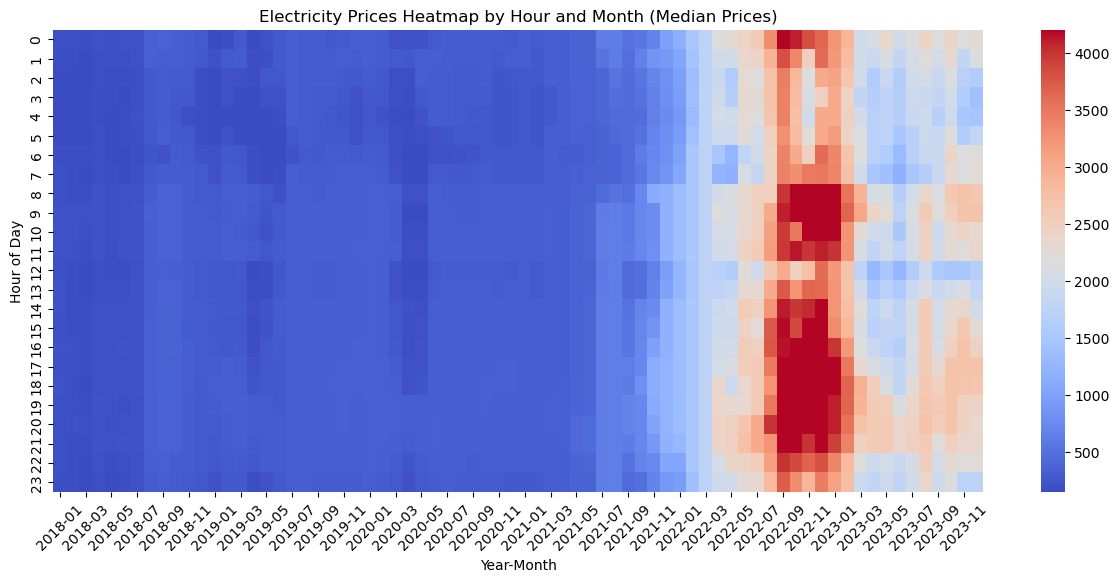

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = df.pivot_table(index="Hour", columns=df["Timestamp"].dt.to_period("M"), values="PTF_TL", aggfunc="median")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table, cmap="coolwarm", robust=True)
plt.xlabel("Year-Month")
plt.ylabel("Hour of Day")
plt.title("Electricity Prices Heatmap by Hour and Month (Median Prices)")
plt.xticks(rotation=45)
plt.show()

#Mid-2022 and early 2023 show intense price spikes, especially during certain months and hours. (Inflation & energy crisis (global increase in fuel prices)).

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

X = df[["Hour", "Day", "Month", "Year", "COVID_Period"]]
y = df["PTF_TL"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [17]:
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

r2, mape

(0.5865374673595, 6338807542547213.0)

In [18]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

X_no_covid = X.drop(columns=["COVID_Period"])
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_no_covid, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train_nc, y_train_nc)
y_pred_linear = linear_model.predict(X_test_nc)
r2_linear = r2_score(y_test_nc, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test_nc, y_pred_linear)

In [19]:
print("Ridge Regression Model with COVID Indicator:")
print(f"R^2 Score: {r2_ridge:.3f}")
print(f"MAPE: {mape_ridge:.3f}\n")

print("Linear Regression Model without COVID Indicator:")
print(f"R^2 Score: {r2_linear:.3f}")
print(f"MAPE: {mape_linear:.3f}")

Ridge Regression Model with COVID Indicator:
R^2 Score: 0.587
MAPE: 6338807542547213.000

Linear Regression Model without COVID Indicator:
R^2 Score: 0.544
MAPE: 7740967443602165.000


## Fuel Price vs Electricity Prices

In [20]:
#Bonus Point -- Analyze the correlation between fuel prices and electricity prices

fuel_df = pd.read_csv("yakit_2022_2023.csv")

fuel_df.columns = ["Timestamp", "UNLEADED GASOLINE (TL/LT)", "KEROSENE (TL/LT)", "TP DIESEL (TL/LT)", "DIESEL (TL/LT)", "HEATING FUEL (TL/KG)", "FUEL OIL (TL/KG)", "Y.K. FUEL OIL (TL/KG)", "TPGAS"]

fuel_df["Timestamp"] = pd.to_datetime(fuel_df["Timestamp"], format="%d.%m.%Y", errors="coerce")

fuel_df["Year"] = fuel_df["Timestamp"].dt.year
fuel_df["Month"] = fuel_df["Timestamp"].dt.month
fuel_df["Day"] = fuel_df["Timestamp"].dt.day

fuel_df

,Timestamp,UNLEADED GASOLINE (TL/LT),KEROSENE (TL/LT),TP DIESEL (TL/LT),DIESEL (TL/LT),HEATING FUEL (TL/KG),FUEL OIL (TL/KG),Y.K. FUEL OIL (TL/KG),TPGAS,Year,Month,Day
0,2022-01-01,"12,94","11,74","12,76","12,72","10,48","9,25","8,16","9,05",2022,1,1
1,2022-01-05,"12,92","11,74","12,79","12,75","10,48","9,25","8,16","9,05",2022,1,5
2,2022-01-07,"12,92","12,44","12,79","12,75","10,48","9,25","8,16","9,05",2022,1,7
3,2022-01-08,"13,55","12,81","13,73","13,68","11,41","10,08","8,78","9,05",2022,1,8
4,2022-01-10,"13,55","12,81","13,73","13,69","11,41","10,08","8,78","9,05",2022,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
303,2023-12-16,"32,98","30,02","35,49","35,45","26,18","22,96","17,96","18,69",2023,12,16
304,2023-12-20,"34,51","30,02","35,51","35,47","26,18","22,96","17,96","18,69",2023,12,20
305,2023-12-21,"34,51","32,44","35,51","35,47","27,19","23,65","19,27","18,69",2023,12,21
306,2023-12-22,"34,51","32,44","37,16","37,12","27,19","23,65","19,27","18,69",2023,12,22


In [21]:
df_monthly = df.groupby(["Year", "Month"]).agg({"PTF_TL": "mean"}).reset_index()
df_monthly = df_monthly[(df_monthly["Year"] >= 2022) & (df_monthly["Year"] <= 2023)]

# Display results
print("Monthly Average Electricity Prices:")
display(df_monthly)

Monthly Average Electricity Prices:


,Year,Month,PTF_TL
48,2022,1,1177.986290
49,2022,2,1404.497679
50,2022,3,1670.846640
51,2022,4,1830.554542
52,2022,5,1763.030403
53,2022,6,2340.134986
54,2022,7,2330.369530
55,2022,8,3066.547016
56,2022,9,3850.592056
57,2022,10,3470.019301


In [22]:
cols_to_convert = ["UNLEADED GASOLINE (TL/LT)", "KEROSENE (TL/LT)", "TP DIESEL (TL/LT)", 
                   "DIESEL (TL/LT)", "HEATING FUEL (TL/KG)", "FUEL OIL (TL/KG)", 
                   "Y.K. FUEL OIL (TL/KG)", "TPGAS"]

# Convert numeric columns: Replace ',' with '.' and cast to float
for col in cols_to_convert:
    fuel_df[col] = fuel_df[col].astype(str).str.replace(",", ".").astype(float)

In [23]:
fuel_monthly = fuel_df.groupby(["Year", "Month"]).mean().reset_index()
fuel_monthly = fuel_monthly.drop(columns=["Timestamp","Day"])

print("Monthly Average Electricity Prices:")
display(fuel_monthly)

Monthly Average Electricity Prices:


,Year,Month,UNLEADED GASOLINE (TL/LT),KEROSENE (TL/LT),TP DIESEL (TL/LT),DIESEL (TL/LT),HEATING FUEL (TL/KG),FUEL OIL (TL/KG),Y.K. FUEL OIL (TL/KG),TPGAS
0,2022,1,13.512727,12.881818,13.676364,13.635455,11.276364,9.953636,8.718182,9.213636
1,2022,2,15.020000,14.173333,15.360000,15.320000,12.630000,11.163333,9.623333,9.696667
2,2022,3,18.925263,18.570526,20.450000,20.412632,16.466842,14.047895,11.943684,10.914737
3,2022,4,19.199000,19.831000,21.446000,21.413000,15.961000,13.179000,11.622000,11.644000
4,2022,5,22.779231,22.046923,22.533846,22.494615,17.333077,14.120000,12.722308,11.170000
5,2022,6,26.874286,26.214286,27.767143,27.728571,20.134286,15.659286,13.161429,12.090000
6,2022,7,23.611429,22.930714,25.372143,25.317857,18.371429,14.256429,11.922857,10.887857
7,2022,8,20.835000,22.875625,24.602500,24.548750,18.391250,15.140000,11.446875,11.457500
8,2022,9,19.245000,22.440714,24.580714,24.525000,17.675000,14.425714,8.814286,11.127143
9,2022,10,20.397000,22.312000,26.244000,26.191000,18.599000,14.391000,10.387000,10.470000


In [24]:
df_monthly["Year"] = df_monthly["Year"].astype(int)
df_monthly["Month"] = df_monthly["Month"].astype(int)
fuel_monthly["Year"] = fuel_monthly["Year"].astype(int)
fuel_monthly["Month"] = fuel_monthly["Month"].astype(int)

merged_df = pd.merge(df_monthly, fuel_monthly, on=["Year", "Month"], how="inner")

print("🔹 Merged Electricity & Fuel Prices:")
display(merged_df.head())

🔹 Merged Electricity & Fuel Prices:


,Year,Month,PTF_TL,UNLEADED GASOLINE (TL/LT),KEROSENE (TL/LT),TP DIESEL (TL/LT),DIESEL (TL/LT),HEATING FUEL (TL/KG),FUEL OIL (TL/KG),Y.K. FUEL OIL (TL/KG),TPGAS
0,2022,1,1177.986290,13.512727,12.881818,13.676364,13.635455,11.276364,9.953636,8.718182,9.213636
1,2022,2,1404.497679,15.020000,14.173333,15.360000,15.320000,12.630000,11.163333,9.623333,9.696667
2,2022,3,1670.846640,18.925263,18.570526,20.450000,20.412632,16.466842,14.047895,11.943684,10.914737
3,2022,4,1830.554542,19.199000,19.831000,21.446000,21.413000,15.961000,13.179000,11.622000,11.644000
4,2022,5,1763.030403,22.779231,22.046923,22.533846,22.494615,17.333077,14.120000,12.722308,11.170000


In [25]:
correlation_matrix = merged_df.corr()

print("🔹 Correlation Matrix between Electricity Prices and Fuel Prices:")
display(correlation_matrix)

🔹 Correlation Matrix between Electricity Prices and Fuel Prices:


,Year,Month,PTF_TL,UNLEADED GASOLINE (TL/LT),KEROSENE (TL/LT),TP DIESEL (TL/LT),DIESEL (TL/LT),HEATING FUEL (TL/KG),FUEL OIL (TL/KG),Y.K. FUEL OIL (TL/KG),TPGAS
Year,1.000000e+00,7.884865e-14,-0.211041,0.577642,0.399518,0.438893,0.438779,0.455699,0.494598,0.563512,0.538146
Month,7.884865e-14,1.000000e+00,0.443369,0.558159,0.670378,0.689288,0.689028,0.649576,0.604271,0.480415,0.548988
PTF_TL,-2.110410e-01,4.433695e-01,1.000000,-0.103905,0.127002,0.104608,0.104055,0.004050,-0.093130,-0.277425,-0.090656
UNLEADED GASOLINE (TL/LT),5.776419e-01,5.581592e-01,-0.103905,1.000000,0.949390,0.958405,0.958464,0.972812,0.968376,0.965048,0.904416
KEROSENE (TL/LT),3.995184e-01,6.703779e-01,0.127002,0.949390,1.000000,0.993620,0.993641,0.983630,0.954906,0.887108,0.909243
TP DIESEL (TL/LT),4.388927e-01,6.892883e-01,0.104608,0.958405,0.993620,1.000000,1.000000,0.992195,0.969086,0.904517,0.920564
DIESEL (TL/LT),4.387793e-01,6.890279e-01,0.104055,0.958464,0.993641,1.000000,1.000000,0.992248,0.969189,0.904700,0.920744
HEATING FUEL (TL/KG),4.556987e-01,6.495763e-01,0.004050,0.972812,0.983630,0.992195,0.992248,1.000000,0.990557,0.941167,0.927197
FUEL OIL (TL/KG),4.945977e-01,6.042705e-01,-0.093130,0.968376,0.954906,0.969086,0.969189,0.990557,1.000000,0.962378,0.940679
Y.K. FUEL OIL (TL/KG),5.635120e-01,4.804151e-01,-0.277425,0.965048,0.887108,0.904517,0.904700,0.941167,0.962378,1.000000,0.892007


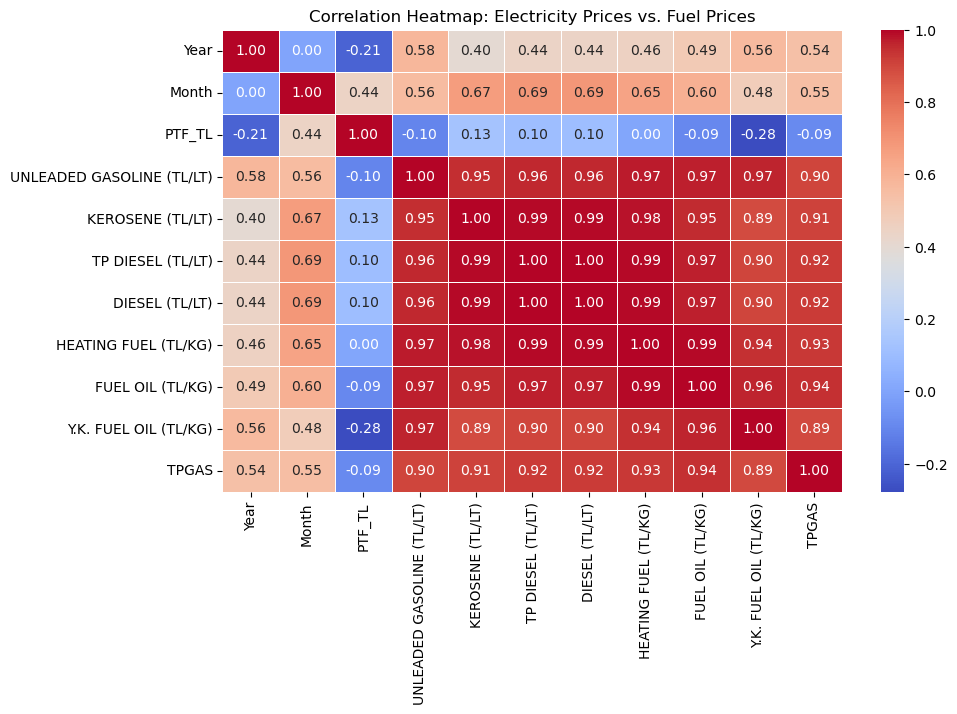

In [26]:
# 🔥 Heatmap of Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Electricity Prices vs. Fuel Prices")
plt.show()

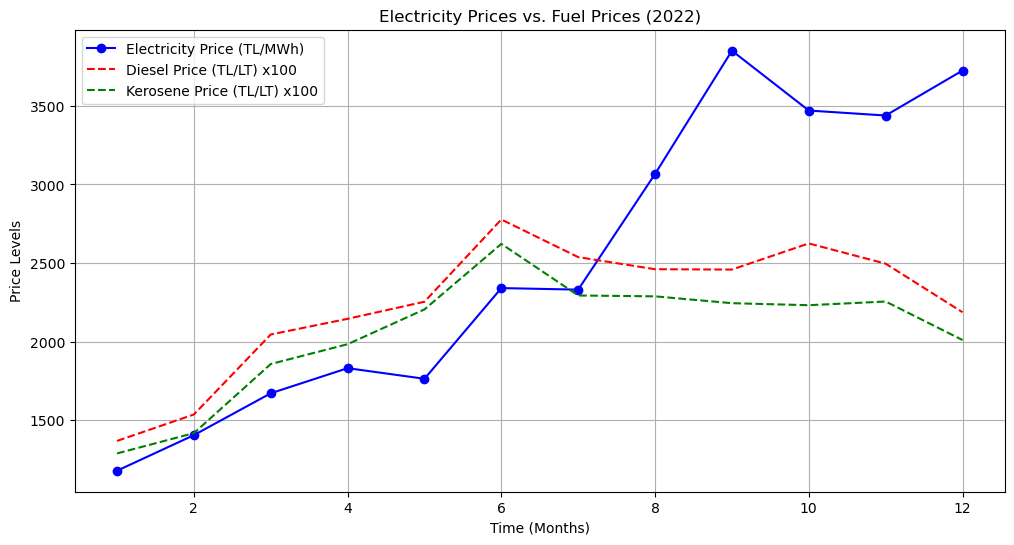

In [27]:
# 📊 Time-Series Plot: Electricity Prices vs. Fuel Prices (2022)
merged_df22 = merged_df[merged_df["Year"]==2022]
plt.figure(figsize=(12, 6))
plt.plot(merged_df22["Month"], merged_df22["PTF_TL"], label="Electricity Price (TL/MWh)", color="blue", marker="o")
plt.plot(merged_df22["Month"], merged_df22["TP DIESEL (TL/LT)"] * 100, label="Diesel Price (TL/LT) x100", color="red", linestyle="--")
plt.plot(merged_df22["Month"], merged_df22["KEROSENE (TL/LT)"] * 100, label="Kerosene Price (TL/LT) x100", color="green", linestyle="--")
plt.xlabel("Time (Months)")
plt.ylabel("Price Levels")
plt.title("Electricity Prices vs. Fuel Prices (2022)")
plt.legend()
plt.grid(True)
plt.show()

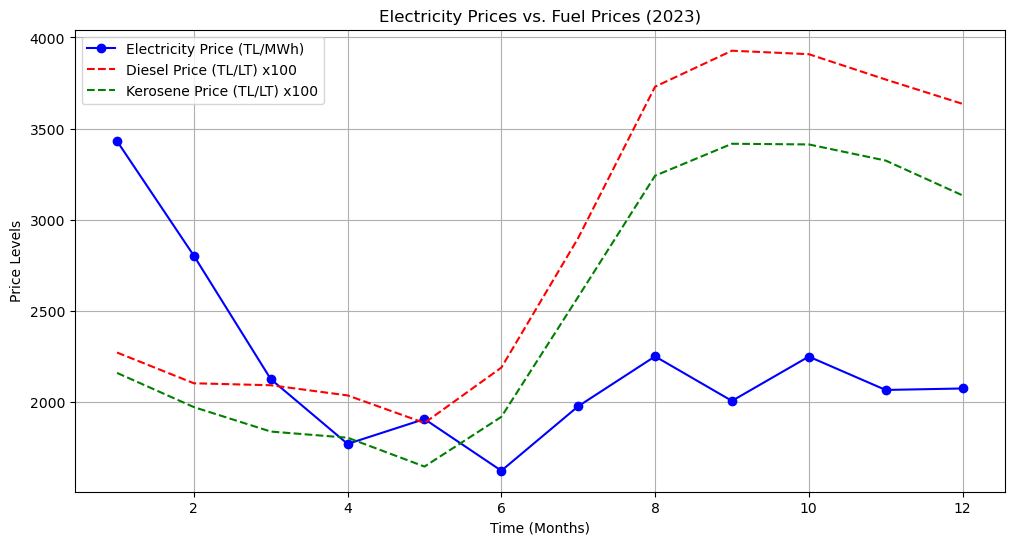

In [28]:
merged_df23 = merged_df[merged_df["Year"]==2023]
plt.figure(figsize=(12, 6))
plt.plot(merged_df23["Month"], merged_df23["PTF_TL"], label="Electricity Price (TL/MWh)", color="blue", marker="o")
plt.plot(merged_df23["Month"], merged_df23["TP DIESEL (TL/LT)"] * 100, label="Diesel Price (TL/LT) x100", color="red", linestyle="--")
plt.plot(merged_df23["Month"], merged_df23["KEROSENE (TL/LT)"] * 100, label="Kerosene Price (TL/LT) x100", color="green", linestyle="--")
plt.xlabel("Time (Months)")
plt.ylabel("Price Levels")
plt.title("Electricity Prices vs. Fuel Prices (2023)")
plt.legend()
plt.grid(True)
plt.show()

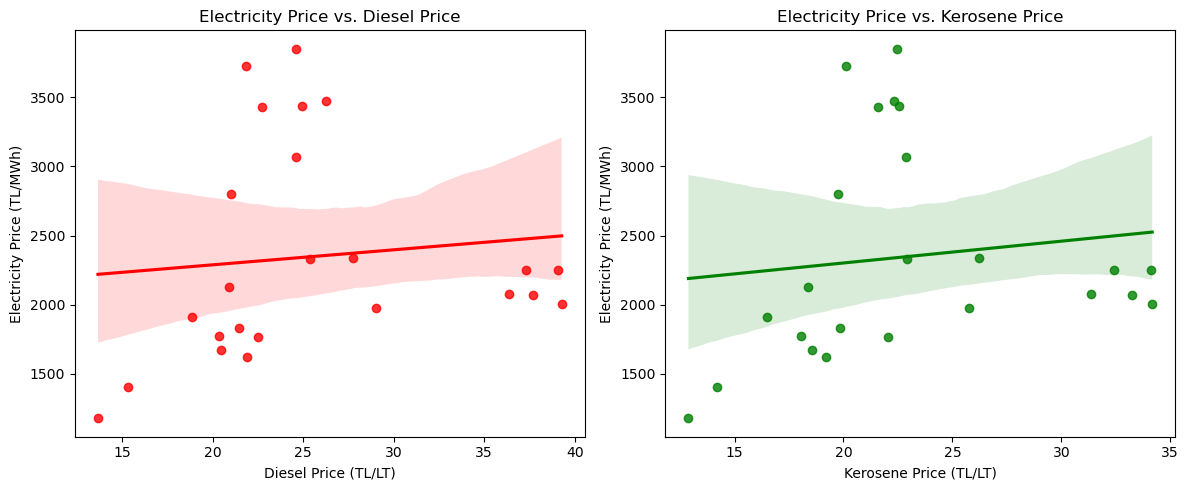

In [29]:
# 📈 Scatter Plots: Electricity Prices vs. Key Fuel Prices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(x=merged_df["TP DIESEL (TL/LT)"], y=merged_df["PTF_TL"], ax=axes[0], color="red")
axes[0].set_title("Electricity Price vs. Diesel Price")
axes[0].set_xlabel("Diesel Price (TL/LT)")
axes[0].set_ylabel("Electricity Price (TL/MWh)")

sns.regplot(x=merged_df["KEROSENE (TL/LT)"], y=merged_df["PTF_TL"], ax=axes[1], color="green")
axes[1].set_title("Electricity Price vs. Kerosene Price")
axes[1].set_xlabel("Kerosene Price (TL/LT)")
axes[1].set_ylabel("Electricity Price (TL/MWh)")
plt.tight_layout()
plt.show()